# <font color='gren'> **Cálculo Numérico - Atividade 3**

## **Alunos:**
* Gabriel Dezejácomo Maruschi - 14571525
* Vitor Alexandre Garcia Vaz - 14611432
* Vitor Pardini Saconi - 14611800

## **1- Origem do método de Newton (fórmula 6.1)**

A fórmula
$$
    x^{(k+1)} = x^{k} - \frac{f(x^{(k)})}{f'(x^{(k)})}, k \geq 0
$$
pertencente ao método de Newton e trata-se de uma aproximação para as raízes de um função $f(x)$, usada geralmente para funções não-polinomiais cujas raízes não podem ser obtidas por fórmulas explicitadas e de passos finitos. Portanto, para a utilização parte-se de um $x^{(0)}$ (dado inicial), para o qual itera-se esperando que a função convirja (não ocorre necessariamente).

Para sua obtenção, partimos do fato de que
$$
    y(x) = f(x^{(k)}) + f'(x^{(k)})(x-x^{(k)})
$$
é a equação da reta tangente à curva $(x, f(x))$ no ponto $x^{(k)}$.

Supondo um ponto $x^{(k+1)}$ tal que $y(x^{(k+1)}) = 0$:
$$
    y(x^{(k+1)}) = f(x^{(k)}) + f'(x^{(k)})\cdot(x^{(k+1)}-x^{(k)})
$$
$$
    0 = f(x^{(k)}) + f'(x^{(k)})\cdot x^{(k+1)} - f'(x^{(k)})\cdot x^{(k)}
$$
$$
    -f'(x^{(k)})\cdot x^{(k+1)} = f(x^{(k)}) - f'(x^{(k)})\cdot x^{(k)}
$$
$$
    x^{(k+1)} = x^{(k)} - \frac{f(x^{(k)})}{f'(x^{(k)})}, k \geq 0
$$
dado que $f'(x^{(k)}) \ne 0$.
Neste método, calcula-se o 0 da função através da substituição local da $f(x)$ pela sua tangente, pontualmente.

**Referências**

*1.  A. Quarteroni and F. Salieri, Scientific Computing with MATLAB and Octave, Springer.*


## **2 - Aplicação do método**

* Imports necessários

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.interpolate import interp1d
from scipy import sparse
import math

*  Cálculo da derivada por diferença finita adiantada

In [2]:
def derivative(f, x, h = 10**(-6)):
    return ((f(x+h) - f(x))/h)

* Método de Newton

In [3]:
def Newton_method(f, x0, tol, max_it):
    k = 0
    eps = tol + 1
    while (k < max_it) and (eps > tol):
        dx = derivative(f, x0)
        delta = - f(x0)/dx                    # calcular o avanço
        eps = np.abs(delta)/np.abs(x0)        # calcular o erro
        x0 += delta                           # avançar
        k += 1                                # incrementar as iterações
    return x0

* Função $r(x)$ a ser analisada

In [4]:
def r(x):
    return (np.cos(x)-x)

* Vamos, agora, aplicar o método de Newton para encontrar os zeros de r(x) = cos(x)-x. Perceba que, para r(x*) = 0, tem-se cos(x*) = x* e, como a função cosseno tem conjunto imagem I = [-1, 1], sabemos que x* pertence a esse intervalo. O gráfico a seguir ilustra isso. Realizada esta análise, vamos para o método prático iterativo

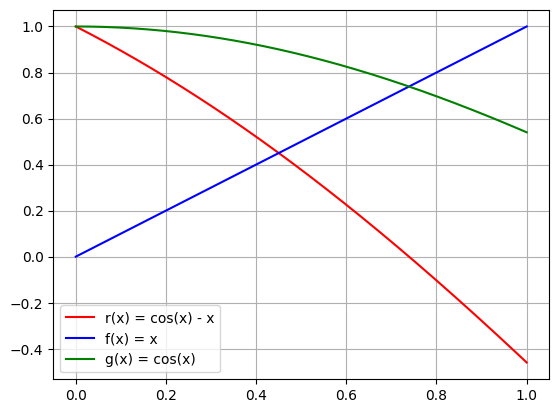

In [5]:
x = np.linspace(0,1,500)
y = r(x)
z = np.cos(x)

plt.plot(x, y, '-r', x, x, '-b', x, z, '-g')
plt.grid()
plt.legend(['r(x) = cos(x) - x','f(x) = x', 'g(x) = cos(x)'])
plt.show()

* Aplicando o método para diferentes valores ($x_i$) de chutes iniciais

In [6]:
xi = [-50, -37.5, -8, -1, -0.5, -0.1, 0.2, 0.5, 1, 18, 63, 137] 

for s in xi:
    a = Newton_method(r, s, 10**(-3), 10**4)
    print(f'Método para xi = {s}: {a}\n\n')

Método para xi = -50: 0.7390851333858756


Método para xi = -37.5: 0.7390851781879105


Método para xi = -8: 0.7390851773345014


Método para xi = -1: 0.7390851385657415


Método para xi = -0.5: 0.739085251326569


Método para xi = -0.1: 0.7390851350468458


Método para xi = 0.2: 0.7390851332158347


Método para xi = 0.5: 0.7390851339333628


Método para xi = 1: 0.7390851333914455


Método para xi = 18: 0.7390851349541218


Método para xi = 63: 0.7390851332151933


Método para xi = 137: 0.739085168710791




* Perceba que, para todos os valores de xi escolhidos por nós, o zero da função tendeu a aproximadamente 0.739085. Mas isso ocorreu porque utilizamos um número relativamente grande de iterações. Vamos testar, agora, para xi = -8.12 (fixo), mas variando a quantidade de iterações, apenas por curiosidade.

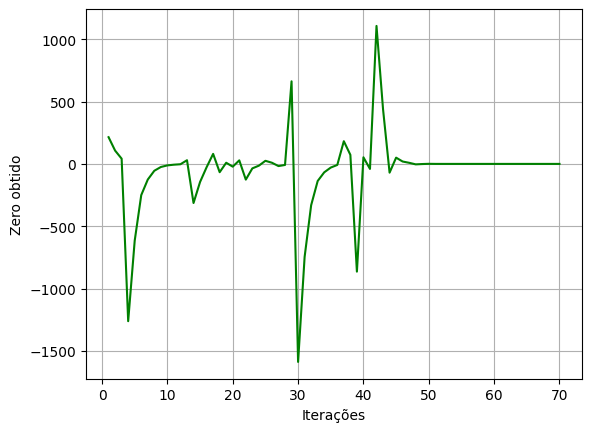

In [7]:
xi = -8.12
N = 70
iter = np.linspace(1, N, N)
b = []

for j in iter:
    c = Newton_method(r, xi, 10**(-3), j)
    b.append(c)

plt.plot(iter, b, '-g')
plt.grid()
plt.xlabel('Iterações')
plt.ylabel('Zero obtido')
plt.show()

* Perceba que o valor do zero encontrado estabiliza a partir de 50 iterações, aproximadamente.

## **3-Iterpretação Geométrica**

 A interpretação geométrica é que, a cada passo, o valor $x^{(k+1)}$ calculado é a interseção do eixo das abscissas com a reta tangente ao gráfico de $r(x)$ no ponto $x^{(k)}$.

* Perceba que a reta tangente ao gráfico de $r(x)$ em $x=x^{(k)}$ é $t(x_0) = r'(x^{(k)})(x_0-x^{(k)}) + r(x^{(k)})$.

* Logo, é fato que a interseção ocorre em $t(x^*) = 0$, ou seja, quando $x^*=-\dfrac{r(x^{(k)})}{r'(x^{(k)})}+x^{(k)} = x^{(k+1)}$.

A imagem a seguir mostra esse processo.

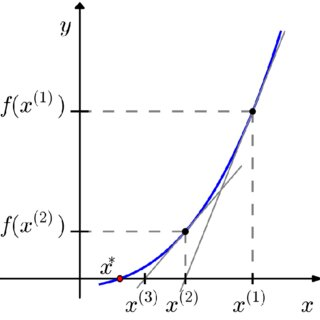

## **4-Aplicação em caso específico de rede hidráulicas**

### **a)Função de definição da rede**

In [8]:
def GeraRede(nx,ny,CH,CV):
    nv = nx*ny
    nc = (nx-1)*ny + (ny-1)*nx
    
    conec = np.zeros(shape=(nc,2),dtype=np.int64)
    C = np.zeros(nc)
    
    # Loop sobre canos horizontais
    for j in range(ny):
        for i in range(nx-1):
          k = j*(nx-1) + i
          conec[k,0] = j*nx + i
          conec[k,1] = j*nx + i+1
          C[k] = CH

    # Loop sobre canos verticais
    for i in range(nx):
      for j in range(ny-1):
          k = (nx-1)*ny + j*nx + i
          conec[k,0] = i + j*nx
          conec[k,1] = i + (j+1)*nx
          C[k] = CV

    return nv, nc, conec, C

### **b)Funções necessárias de rede hidráulica**

* Monta matriz conduc e matriz A

In [9]:
def retorna_conduc(C):
    tam=len(C)
    conduc=np.zeros(shape=(tam,tam),dtype=np.float64)
    for i in range(tam):
        conduc[i][i]=C[i]
    return conduc


def retorna_matriz_A(conec,nc,nv,conduc):
    #Inicia a matriz A que será retornada
    A=np.zeros(shape=(nv,nv),dtype=np.float64)
    
    n1,n2=0,0

    for i in range(nc): # percorre as linhas da matriz de conecções
        
        #recebimento dos nós da linha i da matriz de conecções
        n1,n2=conec[i][0],conec[i][1]

        # adição de elementos conforme a matriz ClocK
        A[n1][n1]=A[n1][n1]+conduc[i][i]    
        A[n1][n2]=A[n1][n2]-conduc[i][i]
        A[n2][n1]=A[n2][n1]-conduc[i][i]
        A[n2][n2]=A[n2][n2]+conduc[i][i]
                        
    
    return A

* Função de formação da matriz Ã e matriz direita

In [10]:
def retorna_matriz_Ã(A,natm):
    rng=len(A[0])
    Ã=A
    for i in range(0,rng):
        if(i==natm):
            Ã[natm][i]=1
        else:
            Ã[natm][i]=0
    return Ã

def retorna_matriz_direita(nv,nB,QB):
    d=np.zeros(nv,dtype=np.float64)
    for i in range(0,nv):
        if(i==nB): d[i]=QB
        else: d[i]=0
    return d



* Função de resolução do sistema e de vazões nodais

In [11]:
def retorna_pressoes(Ã,d):
    #Obtém a matriz exparsa da matriz Ã
    Ã_aux = scipy.sparse.csr_matrix(Ã)

    #Obtém vetor de pressões
    P = sparse.linalg.spsolve(Ã_aux, d)
    return P

def vetor_vazoes_nodos(A,P):
    Q=A@P
    return Q

* Obtenção do vetor de vazões nos canos e da potência da bomba

In [12]:
def retorna_potencia(conduc,D,P):
    Qc=conduc@D@P
    W=(Qc.transpose())@(D@P)
    return W

* Obtenção da matriz D(diferenças)

In [13]:
def retorna_matriz_D(nv,nc,conec):
    l=nc
    c=nv
    D=np.zeros(shape=(l,c),dtype=np.float64)
    for i in range(l):
        n1,n2=conec[i][0],conec[i][1]
        D[i][n1]=1
        D[i][n2]=-1
    return D

* Resolve o sistema

In [14]:
def resolve_sistema(natm,nB,QB,nv,nc,conec,conduc):
    A=retorna_matriz_A(conec,nc,nv,conduc)
    Ã=retorna_matriz_Ã(A,natm)
    d=retorna_matriz_direita(nv,nB,QB)
    P=retorna_pressoes(Ã,d)
    return P
   

* Retorno da potência dissipada em função dos valores variáveis de CH e CV

In [15]:
def potencia_dissipada(nx,ny,nB,QB,natm,CH,CV):
    nv, nc, conec, C = GeraRede(nx,ny,CH,CV)
    conduc=retorna_conduc(C)
    P=resolve_sistema(natm,nB,QB,nv,nc,conec,conduc)
    D=retorna_matriz_D(nv,nc,conec)
    return retorna_potencia(conduc,D,P)  
    

### **c)Definição da função $W(x)$ (potência dissipada) e $r_W(x)$**


* Sendo $r_w(x)$ a função usada no método de Newton para resolver uma dada equação que envolve $W(x)$

In [16]:
def W(x1):
    #   Pré-setagem
    n=8
    m=9
    natm=m*n - 1
    nB=0
    QB=3

    #   Conductâncias dos canos em função de x
    CH=2.3+10*np.exp(-((x1-5)**2))
    CV=1.8+10*np.exp(-((x1-5)**2))

    return(potencia_dissipada(n,m,nB,QB,natm,CH,CV))

def r_W(x2):
    return(W(x2)-12)

* Aplicaremos o método para diferentes valores iniciais de chute ($x_i$).
* Perceba que, dependendo do valor do chute, o zero da função encontrado pode ser distinto. Valores onde a derivada se anula podem até mesmo não levar a nenhuma raíz (valores como 2, 5 ou 10, por exemplo, no nosso caso).

In [17]:
# Aplicando o método
x_i = [2, 3, 4, 5, 6, 7, 10]  # vamos testar para diferentes valores de chute inicial

for j in x_i:
    x_linha = Newton_method(r_W, j, 10**(-3), 10**4)
    print(f'Método para x_i = {j}: x_linha = {x_linha}\n\n')

Método para x_i = 2: x_linha = -inf


Método para x_i = 3: x_linha = 2.860877302116193


Método para x_i = 4: x_linha = 2.8608754738987723


Método para x_i = 5: x_linha = -inf


Método para x_i = 6: x_linha = 7.139124526498218


Método para x_i = 7: x_linha = 7.139122701615734


Método para x_i = 10: x_linha = -inf




/tmp/ipykernel_4242/4028052971.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  delta = - f(x0)/dx                    # calcular o avanço
/tmp/ipykernel_4242/4028052971.py:7: RuntimeWarning: invalid value encountered in scalar divide
  eps = np.abs(delta)/np.abs(x0)        # calcular o erro


* Dessa forma, é possível concluir que, para quaisquer chutes iniciais, os valores de x que satisfazem $r_w(x)$=0 são:

$x_{linha_1}$ = 2.8608

$x_{linha_2}$ = 7.1391

### **d)Verificação de resultados**

Podemos, inicialmente, confirmar os dados obtidos através de um gráfico da função $W(x)$. Veja:

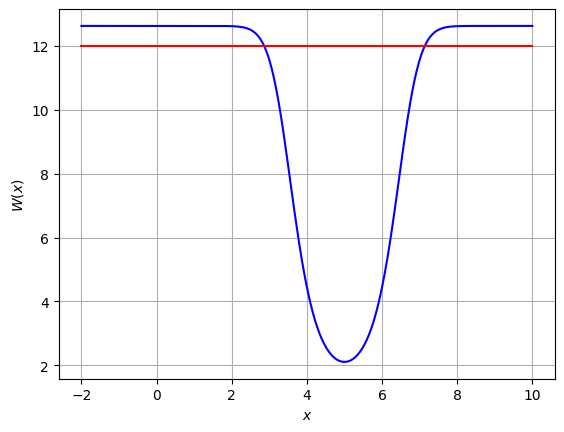

In [18]:
alpha = np.linspace(-2, 10, 200)
beta = []
for s in alpha:
    beta.append(W(s))
gamma = np.linspace(12,12,200)

plt.plot(alpha, beta, '-b', alpha, gamma, '-r')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$W(x)$')
plt.show()

O gráfico de $W(x)$ (azul) intercepta a reta x=12 (vermelha) aproximadamente nos pontos $x_{linha_1}$ = 2.8608 e $x_{linha_2}$ = 7.1391 obtidos, o que confirma os dados coletados. Ademais, podemos comprovar algebricamente, como segue:

In [19]:
ver=W(2.8608)
var=(abs(ver-12)/12)*100
print(f'W(2.8608) = {ver}\n')
print(f'Variação = {var} %\n\n')

ver=W(7.1391)
var=(abs(ver-12)/12)*100
print(f'W(7.1391) = {ver}\n')
print(f'Variação = {var} %\n')

W(2.8608) = 12.000190728380561

Variação = 0.001589403171342596 %


W(7.1391) = 11.999937942350105

Variação = 0.0005171470824609041 %



Analisando $W(x_{linha})$ e a variação desse resultado em relação ao valor esperado (12), é possível perceber a eficácia do método de Newton, já que, para todos os chutes realizados, o resultado foi obtido com uma pequena variação em relação ao valor esperado.